### Comparing Playground Equipment Data Between Pittsburgh Neighborhoods

The dataset that I chose when considering Pokemon-Go is a Playground Equipment dataset, which contains the neighborhood and various other traits about the equipment. In this notebook, I work with dataset to create scores per neighborhood based off of the amount of playgrounds, the size of the playground, and the inclusion factor for handicapped people.

All data was taken from WPRDC.org, which is linked below:

https://data.wprdc.org/dataset/playground-equipment/resource/e39ef76e-0a11-47c8-a86f-a37f55db7a2b 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

The first code block is the important imports in order for my code to work. This imports pandas, which is being used to work with the data sets, and other software that will be used later for graphs and data visualizations. The following code block is importing the playground equipment dataset and printing out the first couple of items to show what it contains.

In [4]:
park_equipment = pd.read_csv("playground_equipment.csv", index_col = "id", parse_dates=True)
hood_data = pd.read_csv("RAC223Neighborhoods_.csv")
park_equipment.head()

name    equipment_type  manufacturer  \
id                                                                         
1780722587          Able Long Playground  Play Area 2 to 5  Little Tykes   
702514290          North Ave. Playground  Play Area 2 to 5     Playworld   
1267038491  Vietnam Veteran's Playground             Slide  Little Tykes   
14898932    Schenley Overlook Playground      Swing 2 Bays  Little Tykes   
204832406   Schenley Overlook Playground             Slide  Little Tykes   

           safety_surface_type ada_accessible  street_number  \
id                                                             
1780722587       Pour in Place              f          211.0   
702514290          SofSurfaces              f          377.0   
1267038491         SofSurfaces              f          108.0   
14898932           SofSurfaces              t            NaN   
204832406          SofSurfaces              f            NaN   

                       street         neighborhood  council_district  ward  \
id                                                                           
1780722587          Coast Ave            Beechview                 4    19   
702514290         W North Ave     Allegheny Center                 1    22   
1267038491  Panther Hollow Rd  Squirrel Hill South                 5    14   
14898932          Overlook Dr  Squirrel Hill South                 5    14   
204832406         Overlook Dr  Squirrel Hill South                 5    14   

                  tract  public_works_division  pli_division  police_zone  \
id                                                                          
1780722587  42003192000                      5            19            6   
702514290   42003562700                      1            22            1   
1267038491  42003980500                      3            14            4   
14898932    42003980500                      3            14            4   
204832406   42003980500                      3            14            4   

           fire_zone   latitude  longitude  
id                                          
1780722587      4-28  40.408381 -80.028520  
702514290        1-7  40.454526 -80.010188  
1267038491       2-8  40.434185 -79.944323  
14898932         2-8  40.432130 -79.947774  
204832406        2-8  40.432215 -79.947817

As you can see, there is a lot of extra information that won't be used, so the following code sorts all of the values by the neighborhood, counting how many times each neighborhood is mentioned, which creates the first scoring system, purely based off of the number of pieces of equipment in each neighborhood. This score acts as a count of both the number of parks and the size because it is the sum of the playground pieces.

In [5]:
park_equipment.sort_values(by="neighborhood", ascending= True)
park_ratings = park_equipment.groupby("neighborhood")["name"].count()
park_ratings.head(10)
#park_ratings.tail(20)

neighborhood
Allegheny Center     15
Allentown             4
Banksville            6
Bedford Dwellings     3
Beechview            21
Beltzhoover          10
Bloomfield            7
Bluff                 2
Bon Air               3
Brighton Heights      8
Name: name, dtype: int64

The next code is where I create new scores for the neighborhoods based on their handicap inclusion. To do so, I first create a new dataset - 'handicap' - that sorts the data to just the neighborhood and the true or false handicap accessible. I then have a for loop to loop through all of the values in handicap checking if the ada_accessible is true. If so, the neighborhood name is added to a new array. This creates an array of the neighborhood names for the amount of times that they contain a piece of handicap accessible equipment. This array is printed and can be seen below the code block. 

I then have another for loop that loops through the values in this new array of neighborhoods, adding 2 to the previous neighborhood ratings for each instance of the neighborhoods. This new value can be seen under the code block as well. I chose to add 2 just because it seemed like a fair score addition, not making any neighborhoods extremely better or worse disproportionally, but still mattering with the overall scoring system.

In [6]:

handicap = park_equipment.sort_values(by=['neighborhood'])
handicap = handicap[['ada_accessible', 'neighborhood']]
newarray = []
for x in range(len(handicap)):
    if handicap.iloc[x, 0] == "t":
        newarray.append(handicap.iloc[x, 1])
print(newarray)
for value in newarray:
    park_ratings[value] += 2
print(park_ratings)

   


['Allegheny Center', 'Allentown', 'Banksville', 'Bedford Dwellings', 'Beechview', 'Beechview', 'Beechview', 'Beechview', 'Beltzhoover', 'Beltzhoover', 'Bloomfield', 'Bloomfield', 'Bluff', 'Bon Air', 'Brighton Heights', 'Brighton Heights', 'Carrick', 'Carrick', 'Central Lawrenceville', 'Crafton Heights', 'Crawford-Roberts', 'Crawford-Roberts', 'Duquesne Heights', 'East Carnegie', 'East Liberty', 'East Liberty', 'Elliott', 'Elliott', 'Elliott', 'Elliott', 'Fairywood', 'Fineview', 'Fineview', 'Garfield', 'Greenfield', 'Greenfield', 'Hazelwood', 'Hazelwood', 'Highland Park', 'Highland Park', 'Highland Park', 'Homewood North', 'Homewood West', 'Lincoln Place', 'Lincoln-Lemington-Belmar', 'Lincoln-Lemington-Belmar', 'Lower Lawrenceville', 'Manchester', 'Manchester', 'Marshall-Shadeland', 'Middle Hill', 'Morningside', 'Morningside', 'Mount Washington', 'Mount Washington', 'Mount Washington', 'New Homestead', 'Oakwood', 'Perry North', 'Perry South', 'Point Breeze North', 'Polish Hill', 'Regent

The next code merges this park data with the neighborhood dataset to change the ranking system from overall park score to a park score per acre. I did this because larger neighborhoods are naturally going to have more parks, so this will make it more fair and more of a density based system. This divides the score by the acres that is gathered from the neighborhood dataset and the resulting Parks_Per_Acre score is shown in the table below.

In [10]:
park_ratings = park_ratings.sort_values()
hood_data = hood_data[['hood', 'acres']]
hood_data = hood_data.sort_values(by=['hood'])
merge = pd.merge(hood_data, park_ratings, left_on = 'hood', right_on = 'neighborhood')
merge.at[42, 'acres'] = 775.68
park_acres = []
for x in range(66):
    park_acres.append(merge.iloc[x, 2] / merge.iloc[x, 1])
merge['Parks_Per_Acre'] = park_acres
merge

hood    acres  name  Parks_Per_Acre
0      Allegheny Center  134.703    17        0.126204
1             Allentown  189.608     6        0.031644
2            Banksville  622.919     8        0.012843
3     Bedford Dwellings  115.252     5        0.043383
4             Beechview  938.804    29        0.030890
..                  ...      ...   ...             ...
61  Upper Lawrenceville  260.349     7        0.026887
62             West End  128.679     5        0.038856
63         West Oakland  138.372     1        0.007227
64             Westwood  445.009     2        0.004494
65              Windgap  266.678     7        0.026249

[66 rows x 4 columns]

The next code block uses the matplotlib that I imported earlier to graph the parks per acre and visually show the distribution. Before I can plot, I wanted to make it look good so I sorted the scores in order so that the graph was constantly increasing, which is purely just for an aesthetic appeal to the readers.

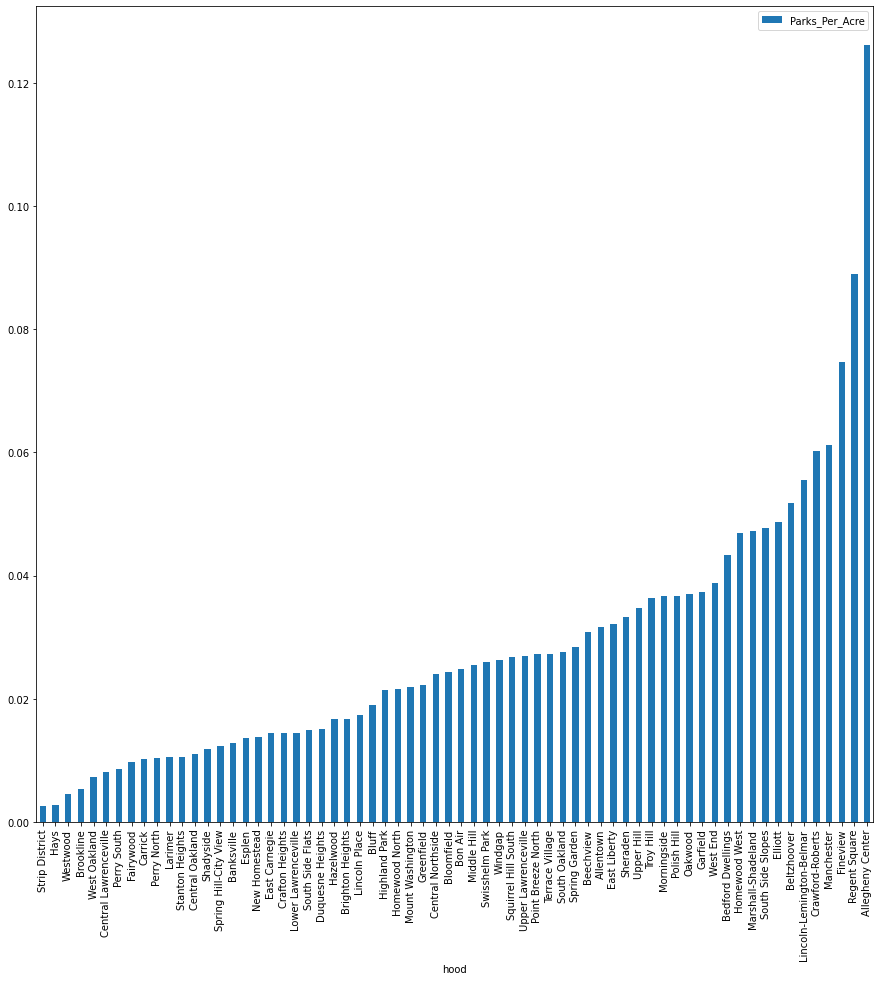

In [34]:
graphable = merge.drop(columns = ['acres', 'name'])
graphable = graphable.sort_values(by = ['Parks_Per_Acre'])
graphable.plot(x = 'hood', y = 'Parks_Per_Acre', kind = 'bar', figsize = (15, 15))

The next code is just a different way to visually show the distribution of park scores per acre. I am using geopandas and the geographical data from the neighborhood dataset to create this map. The darker the green, the greater the density of park equipment. Gray neighborhoods were neighborhoods that weren't included in the park equipment dataset, either they don't have parks or they don't have data for them. 

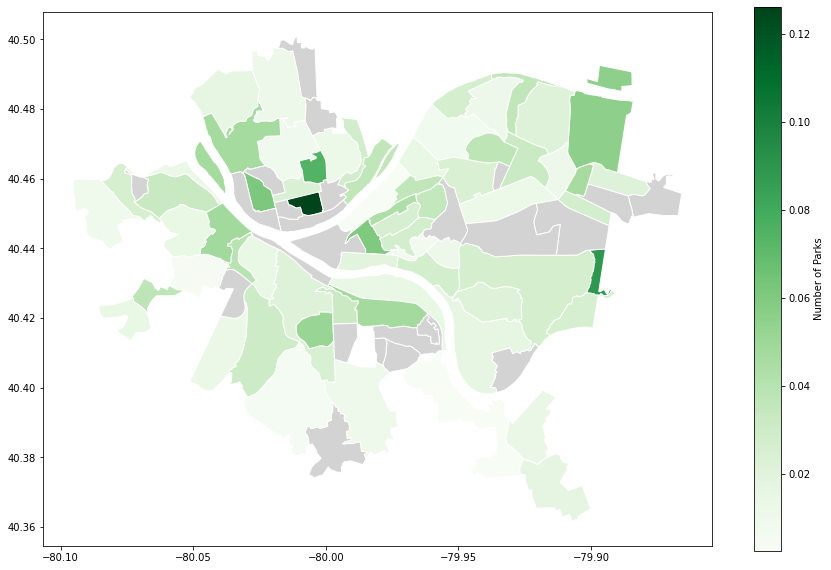

In [35]:
neighborhood_map = geopandas.read_file("Neighborhood/Neighborhoods_.shp")
playground_map = neighborhood_map.merge(graphable, how = "left", left_on = 'hood', right_on = 'hood')
playground_map.plot(column='Parks_Per_Acre', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Parks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

This final code block changes the parks per acre scores from my individual dataset into a more universal format that can be combined with my groupmembers in order for us to make a combined scoring for each neighborhood. We chose to do this because all of our scales were different, as mine is from 0 to .12 and theirs aren't. If we took the averages of our scales without changing them, it wouldn't accurately portray the distributions and wouldn't take into count the three different datasets equally.

To actually create this scaled rating, I take all of the parks per acre values and divide them by the highest score, followed by multiplying by 100 to create a percentage rather than a decimal. This works exactly like weighting a test, where if the highest person gets an 80%, their score becomes 100% and everyone else's move up. With this system, all three of our datasets become from 0 to 100%, which can easily be combined by taking the average.

In [71]:
park_scale = []
for value in graphable['Parks_Per_Acre']:
    park_scale.append((value/graphable.iloc[65, 1]) * 100)
    
graphable["ScaledParks"] = park_scale
dropped_graphable = graphable.drop(columns=['Parks_Per_Acre'])
dropped_graphable = dropped_graphable.sort_values(by=["hood"])
dropped_graphable

hood  ScaledParks
0      Allegheny Center   100.000000
1             Allentown    25.073961
2            Banksville    10.176226
3     Bedford Dwellings    34.375568
4             Beechview    24.476618
..                  ...          ...
61  Upper Lawrenceville    21.304457
62             West End    30.788652
63         West Oakland     5.726380
64             Westwood     3.561144
65              Windgap    20.798844

[66 rows x 2 columns]

In conclusion, the best neighborhood in terms of just parks is Allegheny Center, which can be seen in the graph, heatmap, and the final tables.